# Mushroom Classification Project

**Author:** Lindsay Foster 

**Date:** November 2025  

**Course:** Applied Machine Learning – Midterm Project 

## Overview: 
This project applies machine learning classification techniques to predict whether a mushroom is edible or poisonous based on its physical characteristics.  
The analysis follows a structured workflow including data exploration, preprocessing, feature selection, model training, evaluation, and comparison of multiple classifiers.

In [22]:
# imports
from ucimlrepo import fetch_ucirepo
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


## Section 1. Import and Inspect the Data

In [6]:
# Fetch dataset
from ucimlrepo import fetch_ucirepo

mushroom = fetch_ucirepo(id=73)

# Data (as pandas DataFrames)
X = mushroom.data.features
y = mushroom.data.targets

# Show first 10 rows of features and target
print("🔹 Features (X) - First 10 rows:")
display(X.head(10))

print("\n🔹 Target (y) - First 10 rows:")
display(y.head(10))

mushroom_df = pd.concat([X, y], axis=1)
mushroom_df.head(10)


🔹 Features (X) - First 10 rows:


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
5,x,y,y,t,a,f,c,b,n,e,...,s,w,w,p,w,o,p,k,n,g
6,b,s,w,t,a,f,c,b,g,e,...,s,w,w,p,w,o,p,k,n,m
7,b,y,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,s,m
8,x,y,w,t,p,f,c,n,p,e,...,s,w,w,p,w,o,p,k,v,g
9,b,s,y,t,a,f,c,b,g,e,...,s,w,w,p,w,o,p,k,s,m



🔹 Target (y) - First 10 rows:


,poisonous
0,p
1,e
2,e
3,p
4,e
5,e
6,e
7,e
8,p
9,e


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
5,x,y,y,t,a,f,c,b,n,e,...,w,w,p,w,o,p,k,n,g,e
6,b,s,w,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,n,m,e
7,b,y,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,s,m,e
8,x,y,w,t,p,f,c,n,p,e,...,w,w,p,w,o,p,k,v,g,p
9,b,s,y,t,a,f,c,b,g,e,...,w,w,p,w,o,p,k,s,m,e


In [7]:
# Combine features and target for convenience
mushroom_df = pd.concat([X, y], axis=1)

# Check basic info
print("🔹 Dataset Overview:")
mushroom_df.info()

# Check for missing values
print("\n🔹 Missing Values per Column:")
print(mushroom_df.isnull().sum())

# Check for duplicates
duplicate_count = mushroom_df.duplicated().sum()
print(f"\n🔹 Number of Duplicate Rows: {duplicate_count}")

# Display summary statistics
print("\n🔹 Summary Statistics (Numerical Columns):")
display(mushroom_df.describe())

# Display basic info for categorical columns
print("\n🔹 Summary of Categorical Columns:")
display(mushroom_df.describe(include=['object']))


🔹 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stal

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208



🔹 Summary of Categorical Columns:


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


### Reflection 1: 
The data is mostly intact, however, the column stalk root has 2480 missing values. Since this feature is categorical and has a large number of missing entries, I plan to impute these as "unknown" rather than drop the entire column.
This approach will preserve all rows for model training while allowing the model to learn from the known root types.

In [9]:
# Fill missing values in 'stalk-root' with the label 'unknown'
mushroom_df['stalk-root'] = mushroom_df['stalk-root'].fillna('unknown')

# Verify the fix
print(mushroom_df['stalk-root'].value_counts(dropna=False))
print("\nRemaining missing values:", mushroom_df['stalk-root'].isnull().sum())


stalk-root
b          3776
unknown    2480
e          1120
c           556
r           192
Name: count, dtype: int64

Remaining missing values: 0


## Section 2: Data Exploration and Preparation

### 2.1 Explore Data Patterns and Distributions

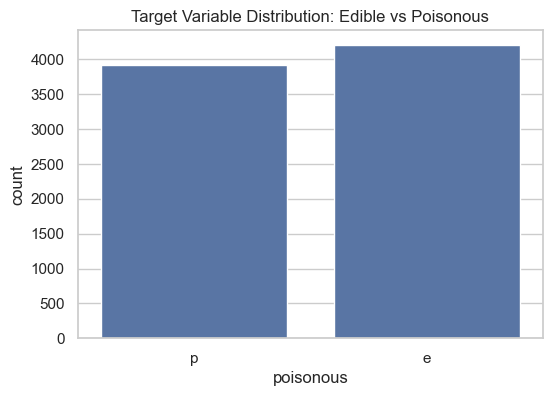

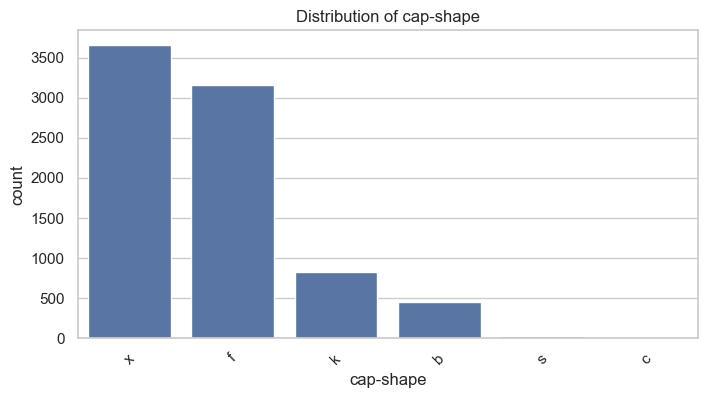

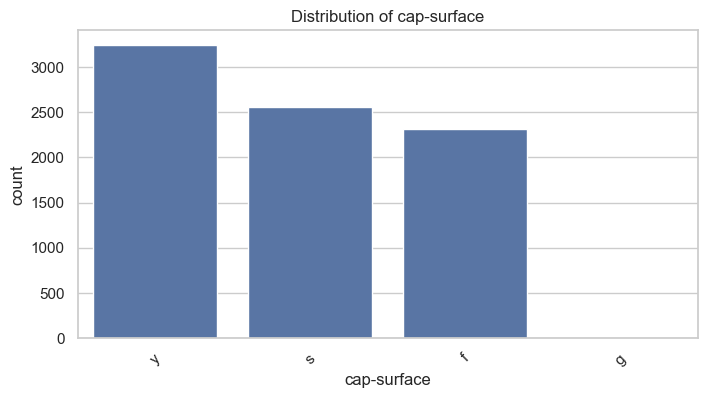

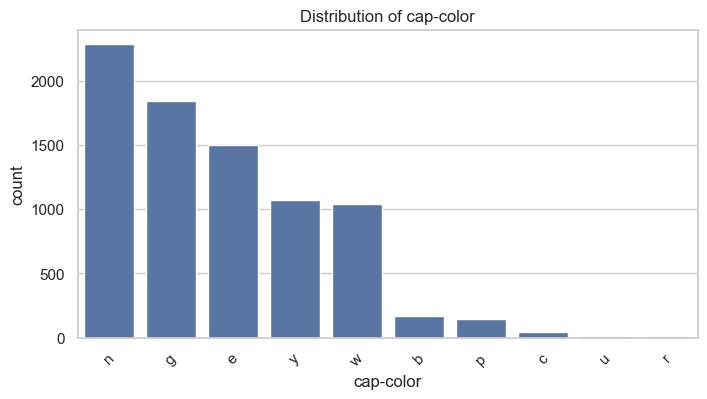

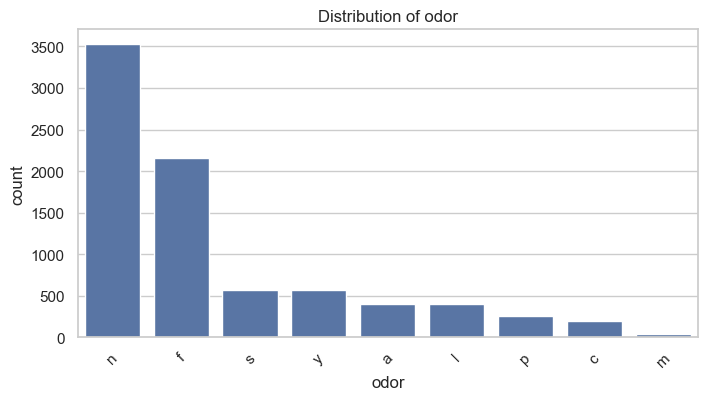

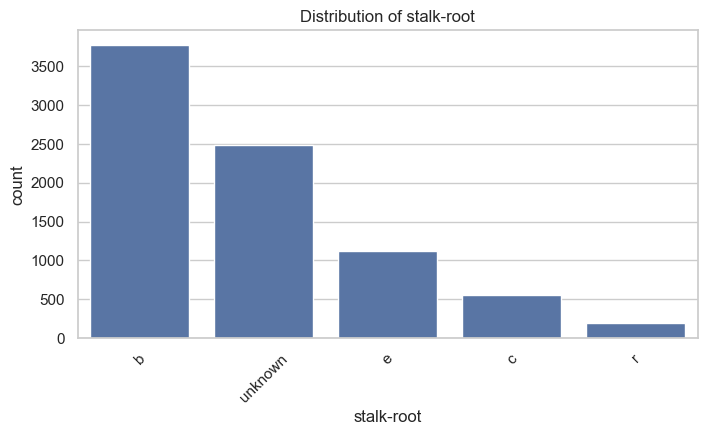

In [10]:
# Set general plotting style
sns.set(style="whitegrid")

# Count plot of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='poisonous', data=mushroom_df)
plt.title("Target Variable Distribution: Edible vs Poisonous")
plt.show()

# Count plots for a few categorical features
categorical_features = ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'stalk-root']

for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=mushroom_df, order=mushroom_df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

### Reflection: 
Mushrooms are pretty balanced between edible and poisonous. 

### 2.2 Handle missing values and clean data

In [11]:
# Encode categorical features using one-hot encoding
X_encoded = pd.get_dummies(mushroom_df.drop('poisonous', axis=1), drop_first=True)
y_encoded = mushroom_df['poisonous'].map({'e':0, 'p':1})  # Encode target as 0/1

# Check resulting dataframe shape
print("Encoded feature shape:", X_encoded.shape)

Encoded feature shape: (8124, 95)


### 2.3 Feature selection and engineering

In [12]:
# Handle missing values in 'stalk-root'
mushroom_df['stalk-root'] = mushroom_df['stalk-root'].fillna('unknown')

# Verify missing values are gone
print("Remaining missing values in stalk-root:", mushroom_df['stalk-root'].isna().sum())

# Create new feature 'cap_look' (cap-shape + cap-color)
mushroom_df['cap_look'] = mushroom_df['cap-shape'] + "_" + mushroom_df['cap-color']

# Preview the new feature
display(mushroom_df[['cap-shape', 'cap-color', 'cap_look']].head(10))

Remaining missing values in stalk-root: 0


,cap-shape,cap-color,cap_look
0,x,n,x_n
1,x,y,x_y
2,b,w,b_w
3,x,w,x_w
4,x,g,x_g
5,x,y,x_y
6,b,w,b_w
7,b,w,b_w
8,x,w,x_w
9,b,y,b_y


In [13]:
# Select features for modeling
# We keep the new 'cap_look', plus other important features
features = ['cap_look', 'odor', 'stalk-root']
X = mushroom_df[features]

# Encode the target variable as 0/1
y = mushroom_df['poisonous'].map({'e':0, 'p':1})

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Display the shape of the final feature set
print("Shape of X_encoded:", X_encoded.shape)
display(X_encoded.head(10))

Shape of X_encoded: (8124, 49)


,cap_look_b_g,cap_look_b_n,cap_look_b_p,cap_look_b_w,cap_look_b_y,cap_look_c_w,cap_look_c_y,cap_look_f_b,cap_look_f_c,cap_look_f_e,...,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,stalk-root_c,stalk-root_e,stalk-root_r,stalk-root_unknown
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
6,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
9,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


### Reflection
- Created 'cap_look' by combining cap-shape and cap-color to capture overall mushroom appearance.
- Missing values in 'stalk-root' were imputed with 'unknown'.
- One-hot encoding converted categorical features into numeric format suitable for machine learning.

### 3: Feature Selection and Justification
#### 3.1 Choose features and target

In [14]:
# Features to use for modeling
features = ['cap_look', 'odor', 'stalk-root']

# Assign input features to X
X = mushroom_df[features]

# Encode the target variable as numeric
y = mushroom_df['poisonous'].map({'e':0, 'p':1})

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Verify shapes
print("Shape of X_encoded:", X_encoded.shape)
print("Number of target samples:", y.shape[0])

# Preview first 5 rows
X_encoded.head()


Shape of X_encoded: (8124, 49)
Number of target samples: 8124


,cap_look_b_g,cap_look_b_n,cap_look_b_p,cap_look_b_w,cap_look_b_y,cap_look_c_w,cap_look_c_y,cap_look_f_b,cap_look_f_c,cap_look_f_e,...,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,stalk-root_c,stalk-root_e,stalk-root_r,stalk-root_unknown
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


I selected cap_look, odor, and stalk-root as input features because they are directly related to mushroom characteristics that indicate edibility or toxicity.

- odor is highly predictive, as certain odors are almost exclusively associated with poisonous mushrooms.

- cap_look summarizes both shape and color, creating a feature that captures more complex visual patterns than either feature alone.

- stalk-root may provide structural clues and is fully retained after imputing missing values with "unknown".

*By using these features and one-hot encoding them, the dataset is now ready for training classification models.*

#### Heatmap of odor and cap look

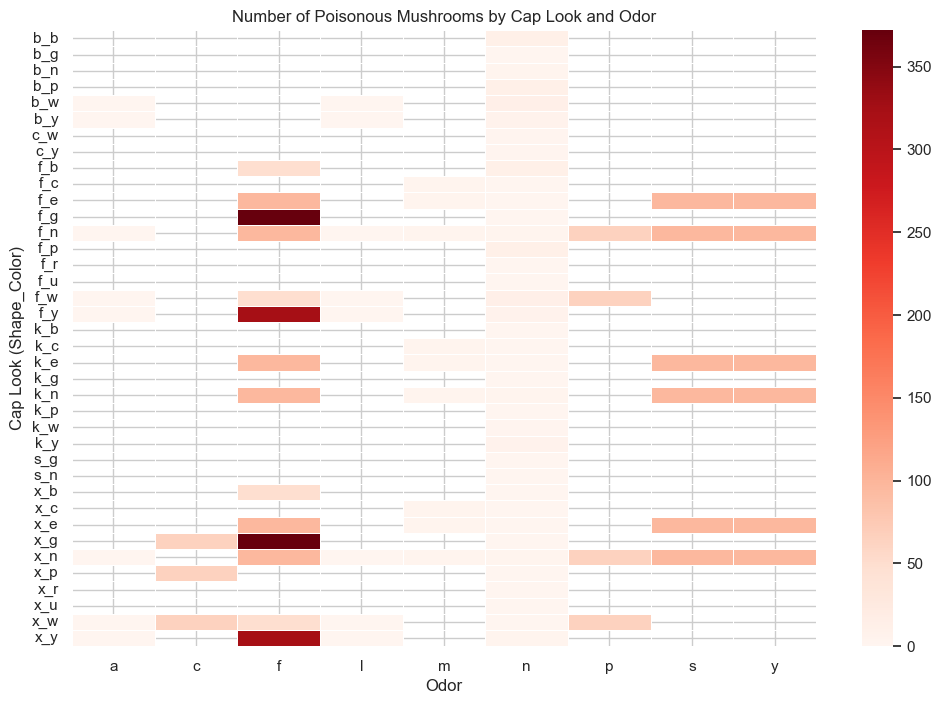

In [17]:
# Pivot table for heatmap: rows = cap_look, columns = odor, values = count of poisonous mushrooms
heatmap_data = pd.crosstab(mushroom_df['cap_look'], mushroom_df['odor'], 
                           values=(mushroom_df['poisonous'] == 'p').astype(int), aggfunc='sum')

plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, cmap='Reds', linewidths=0.5)
plt.title("Number of Poisonous Mushrooms by Cap Look and Odor")
plt.ylabel("Cap Look (Shape_Color)")
plt.xlabel("Odor")
plt.show()


*Dark colored cell → many poisonous mushrooms have this combination → highly predictive for the model.*

*A light colored cell: Very few poisonous mushrooms with that combination → not as informative for predicting toxicity.*

#### 3.2 Define X and y

In [18]:
# Select input features
features = ['cap_look', 'odor', 'stalk-root']
X = mushroom_df[features]

# Encode target variable
y = mushroom_df['poisonous'].map({'e':0, 'p':1})

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Verify shapes and preview
print("Shape of X_encoded:", X_encoded.shape)
print("Number of samples in y:", y.shape[0])
display(X_encoded.head(10))

Shape of X_encoded: (8124, 49)
Number of samples in y: 8124


,cap_look_b_g,cap_look_b_n,cap_look_b_p,cap_look_b_w,cap_look_b_y,cap_look_c_w,cap_look_c_y,cap_look_f_b,cap_look_f_c,cap_look_f_e,...,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,stalk-root_c,stalk-root_e,stalk-root_r,stalk-root_unknown
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
6,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
9,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


### Reflection:
- Selected features: 'cap_look', 'odor', 'stalk-root' for predictive power.
- 'odor' is highly indicative of poisonous mushrooms.
- 'cap_look' combines cap shape and color to capture visual patterns.
- 'stalk-root' provides structural information and missing values were imputed as 'unknown'.
- One-hot encoding converts categorical data into numeric form suitable for modeling.
These features are expected to improve prediction accuracy and model interpretability.

### 4: Train a Model
#### 4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).
#### 4.2 Train model using Scikit-Learn model.fit() method.
#### 4.3 Evalulate performance.

In [23]:
# Split the data into training and test sets
# Stratify to maintain class balance


X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

# Train Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("=== Model Performance Metrics ===")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

print("\n=== Confusion Matrix ===")
print(conf_matrix)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


Training samples: 5686
Test samples: 2438
=== Model Performance Metrics ===
Accuracy:  0.9979
Precision: 0.9991
Recall:    0.9966
F1-score:  0.9979

=== Confusion Matrix ===
[[1262    1]
 [   4 1171]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

